<a href="https://colab.research.google.com/github/faiz-ali-chishti/deep-learning-using-tensorflow-keras/blob/main/gd_and_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of stochastic and batch grandient descent in python**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Load the dataset in pandas dataframe

In [ ]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
19,800,1,32.0
16,1180,3,48.0
6,2732,4,135.0
12,1000,2,38.0


### Preprocessing/Scaling: Since our columns are on different sacle it is important to perform scaling on them

In [ ]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [ ]:
w = np.ones(shape=2)

In [ ]:
np.dot(w, scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

### Now is the time to implement batch gradient descent.

In [ ]:
from functools import total_ordering
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):

  number_of_features = X.shape[1]
  w = np.ones(shape=number_of_features)
  b = 0
  total_samples = X.shape[0]

  cost_list = []
  eposch_list = []

  for i in range(epochs):
    y_predicted = np.dot(w, scaled_X.T) + b

    w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true-y_predicted))

    if i%10==0:
      cost_list.append(cost)
      eposch_list.append(i)
  return w, b, cost, cost_list, eposch_list

w, b, cost, cost_list, eposch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

### Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

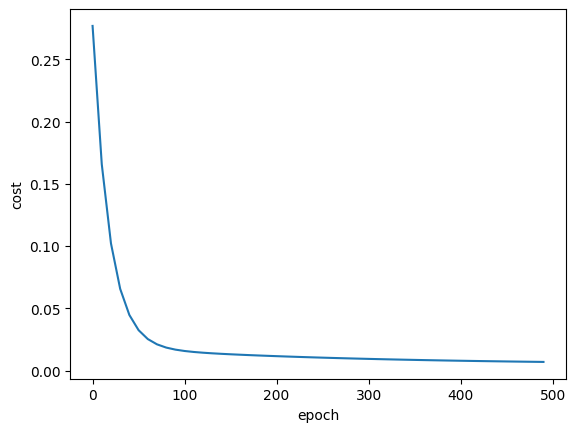

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(eposch_list, cost_list)

### Lets do some predictions now.

In [ ]:
def predict(area, bedrooms, w, b):
  scaled_X = sx.transform([[area, bedrooms]])[0]

  scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
  return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600, 4, w, b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [ ]:
predict(3000, 3, w, b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(118.85541480920799)

In [ ]:
predict(1000, 2, w, b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.253094462442355)

In [ ]:
import random
random.randint(0,6)

2

### **Stochastic Gradient Descent Implementation**

### Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [ ]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_predicted)

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70333294, 0.67342267]),
 np.float64(-0.22740252253447948),
 np.float64(0.05181548641238281))

In [ ]:
w,b,cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

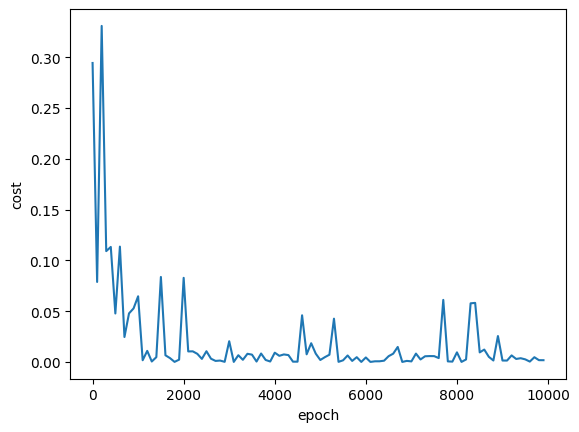

In [ ]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [ ]:
predict(2600,4,w_sgd, b_sgd)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.41915515709655)

In [ ]:
predict(1000,2,w_sgd, b_sgd)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(30.57694687650241)

In [ ]:
predict(1500,3,w_sgd, b_sgd)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(69.67564265597953)